<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
type(trainX)

numpy.ndarray

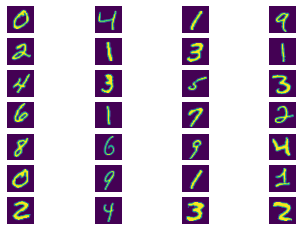

In [5]:
for i in range(1,29):
    plt.subplot(7,4,i)
    plt.imshow(trainX[i])
    plt.axis('off')
plt.show()

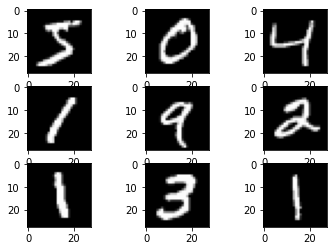

In [5]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [7]:
# one hot encode target values
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

In [8]:
print(trainY[0])
print(trainY_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [10]:
type(trainX)

numpy.ndarray

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)       

In [19]:
history = model.fit(trainX, trainY_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (testX, testY_cat))


Epoch 1/10
469/469 [==============================] - 37s 55ms/step - loss: 0.3022 - acc: 0.9163 - val_loss: 0.6941 - val_acc: 0.7502
Epoch 2/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0448 - acc: 0.9866 - val_loss: 0.0871 - val_acc: 0.9730
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0742 - val_acc: 0.9785
Epoch 4/10
469/469 [==============================] - 29s 63ms/step - loss: 0.0226 - acc: 0.9931 - val_loss: 0.0518 - val_acc: 0.9847
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0546 - val_acc: 0.9838
Epoch 6/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0523 - val_acc: 0.9862
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0114 - acc: 0.9962 - val_loss: 0.0631 - val_acc: 0.9844
Epoch 8/10
469/469 [==============================] - 36s 77ms

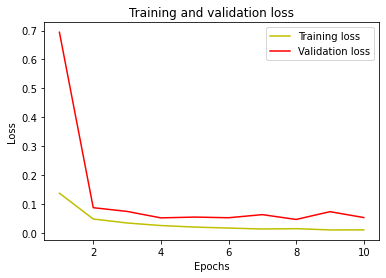

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

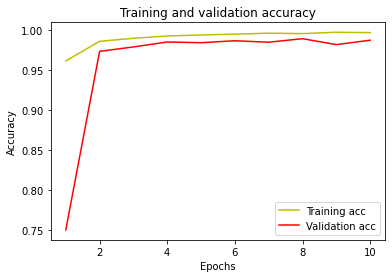

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
prediction = model.predict_classes(testX)
print("Actual Labels    : ", testY)
print("Predicted Labels : ", prediction)


/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual Labels    :  [7 2 1 ... 4 5 6]
Predicted Labels :  [7 2 1 ... 4 5 6]


In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testY, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9869


Predicted Label:  8
True Label:  8


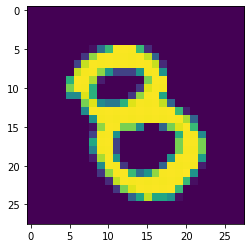

In [24]:
i = random.randint(1,len(prediction))
plt.imshow(testX[i,:,:,0]) 
print("Predicted Label: ", int(prediction[i]))
print("True Label: ", int(testY[i]))


In [28]:
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        import itertools
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        #plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

Confusion matrix, without normalization


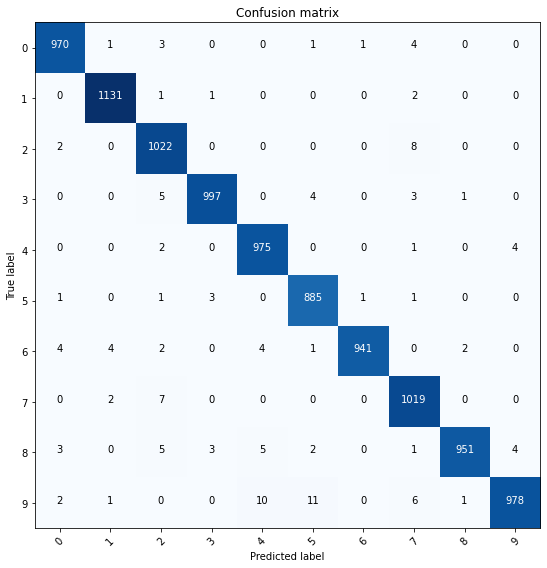

In [29]:
from sklearn.metrics import confusion_matrix
test_label_list=list(np.unique(testY))
cnf_matrix = confusion_matrix(testY, prediction,labels=test_label_list)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_label_list,
                      title='Confusion matrix')

In [ ]:
test_label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
testY

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(testY, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
for i in range(1):
    print(i)

0
